In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib. pyplot as plt

In [ ]:
gzpc = pd.read_csv ('gzpc_23.csv')

In [ ]:
gzpc.head()

,memberID,age_start,dist_park,gender,job_type,last_visit23,most_common,total_games,total_spend,total_visits23,passholder,years_member
0,1,35,18,M,S,2023-09-03,Wheel Deal,538,4900.88,11,0,1
1,2,17,130,M,R,2023-07-14,Connect 4 Hoops,642,5658.99,10,0,19
2,3,49,138,M,S,2023-06-08,Connect 4 Hoops,623,4720.21,11,0,12
3,4,21,80,M,H,2023-08-24,Star Wars,669,5761.57,9,0,17
4,5,39,110,M,H,2023-08-08,Star Wars,484,4140.06,8,0,10


As i ran the head function i can only see 5 rows

In [ ]:
shape = gzpc.shape
print("shape of the dataset",shape)

shape of the dataset (278, 12)


Dataset has 278 rows and 12 columns

after reading the description, here is the data type for the variable:
1. memberID- numeric
2. age_start - nueric
3. dist_park - numeric
4. gender - categorical
5. job_type - categorical
6. passholder - numeric
7. last_visit23 - numeric
8. most_common - categorical
9. total_games - numeric
10. total_spend - numeric
11. total_visits23 - numeric
12. years_member - numeric





In [ ]:
gzpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   memberID        278 non-null    int64  
 1   age_start       278 non-null    int64  
 2   dist_park       278 non-null    int64  
 3   gender          278 non-null    object 
 4   job_type        278 non-null    object 
 5   last_visit23    278 non-null    object 
 6   most_common     278 non-null    object 
 7   total_games     278 non-null    int64  
 8   total_spend     278 non-null    float64
 9   total_visits23  278 non-null    int64  
 10  passholder      278 non-null    int64  
 11  years_member    278 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 26.2+ KB


In [ ]:
(nan_count)=gzpc.isnull().sum().sum()
print(nan_count)
missing_data = gzpc.isna().any().any()
print(missing_data)
is_blank = (gzpc == '').any().any()
print(is_blank)

0
False
False


No there are no NaN values,missing or blank








In [ ]:
gzpc['SuperPlayers']= (gzpc['total_spend']>5000)& (gzpc['total_visits23']>=15)
gzpc.head()


,memberID,age_start,dist_park,gender,job_type,last_visit23,most_common,total_games,total_spend,total_visits23,passholder,years_member,SuperPlayers
0,1,35,18,M,S,2023-09-03,Wheel Deal,538,4900.88,11,0,1,False
1,2,17,130,M,R,2023-07-14,Connect 4 Hoops,642,5658.99,10,0,19,False
2,3,49,138,M,S,2023-06-08,Connect 4 Hoops,623,4720.21,11,0,12,False
3,4,21,80,M,H,2023-08-24,Star Wars,669,5761.57,9,0,17,False
4,5,39,110,M,H,2023-08-08,Star Wars,484,4140.06,8,0,10,False


In [ ]:
total_spend= gzpc.total_spend.sum()
print("Total amount of spending among members of the Gold Zone Players Club across the season is", total_spend)

Total amount of spending among members of the Gold Zone Players Club across the season is 1347562.61


In [ ]:
gzpc['most_common'].value_counts(dropna = False)

Star Wars                 96
Connect 4 Hoops           61
Wheel Deal                55
Space Invaders            49
Dance Dance Revolution    10
Gone Fishin                7
Name: most_common, dtype: int64

In [ ]:
gzpc.groupby('most_common')['total_spend'].mean() . sort_values(ascending= False)

most_common
Dance Dance Revolution    5119.498000
Star Wars                 4877.515521
Connect 4 Hoops           4858.256230
Wheel Deal                4823.218364
Space Invaders            4762.149796
Gone Fishin               4735.737143
Name: total_spend, dtype: float64

*Even though according to the most common variable Dance Dance Revolution is the second least preferred game but through average total spending we understand that Dance Dance Revolution has a significantly higher average spending compared to the other games, while the differences between the average spending of the other games are relatively smaller.so this means  that Dance Dance Revolution is likely the most popular or engaging game among members, leading to higher spending on average compared to the other games. On the other hand, Gone Fishin seems to be less popular or less engaging, resulting in lower average spending. The differences in average spending is providing us insights into the relative popularity and appeal of different games among members.*  

In [ ]:
mean_ages=gzpc.groupby(['most_common','gender']) ['age_start'].mean().sort_values(ascending= False)
print (mean_ages)

most_common             gender
Gone Fishin             M         33.400000
Connect 4 Hoops         F         33.117647
Star Wars               F         30.434783
Space Invaders          M         30.157895
Dance Dance Revolution  F         30.000000
Star Wars               M         29.219178
Connect 4 Hoops         M         26.659091
Space Invaders          F         26.454545
Wheel Deal              F         26.142857
Gone Fishin             F         26.000000
Wheel Deal              M         25.414634
Dance Dance Revolution  M         24.142857
Name: age_start, dtype: float64


In [ ]:
Unique_ages= mean_ages.unique
print(Unique_ages)
length= len (mean_ages)
print("number of unique groups=",length)

<bound method Series.unique of most_common             gender
Gone Fishin             M         33.400000
Connect 4 Hoops         F         33.117647
Star Wars               F         30.434783
Space Invaders          M         30.157895
Dance Dance Revolution  F         30.000000
Star Wars               M         29.219178
Connect 4 Hoops         M         26.659091
Space Invaders          F         26.454545
Wheel Deal              F         26.142857
Gone Fishin             F         26.000000
Wheel Deal              M         25.414634
Dance Dance Revolution  M         24.142857
Name: age_start, dtype: float64>
number of unique groups= 12


*Through this data we get to know the demographics of each game which can then help lobster land to understand their customers prefrences much better and can therefore use them to increase promotion. This can be done through following ways-*

*1. Events : Lobster Land could organize events centered around popular games to attract specific demographics. For instance, they could host gaming ladies nights for Dance Dance Revolution as this game is most popular amongst women of an average of 30.Or Tournaments for males for Star wars games.*

*2. Customer Engagement: develop loyalty programs, gather feedback, and enhance customer satisfaction.*

*3. Partnerships and Collaborations: Lobster Land could explore partnerships or collaborations with different brands like females can use their tickets or points to buy make up from mac.*

In [ ]:
total_spend_std= gzpc.total_spend.std ()
print ("standard devistion of total spend",total_spend_std)

total_visit_std= gzpc.total_visits23.std()
print("standard deviation of total visit=",total_visit_std)

standard devistion of total spend 642.6274105064695
standard deviation of total visit= 3.4573698425372608


*It is misleading to directly compare these two numbers when comparing the variables' relative levels of dispersion because the scales of these variables are  different. Total spending is measured in dollars, which  have a much larger scale than total park visits, which are count of visits by the member.*

In [ ]:
total_spend_mean =gzpc.total_spend.mean ()
cv_total_spend = (total_spend_std/total_spend_mean)
print("CV of total spend", cv_total_spend)

total_visit_mean= gzpc.total_visits23.mean()
cv_total_visit = (total_visit_std/total_visit_mean)
print("CV of total visit", cv_total_visit)



CV of total spend 0.13257300165132846
CV of total visit 0.2794037256469066


*We should used  coefficient of variation because it allows us to do a  direct comparison of the relative variability between two variables inspite of having different units or scales. Which makes it useful for us to compare total spend variable with total visit*

*When we use the CV, we get a percentage that tells us the relative variability of the numbers. This is easier to understand than just looking at the standard deviation, which is in the same units as the original data.*

*The CV of total spend (13.26%) suggests that the variability in spending amounts relative to the mean spending is relatively low.*
*The CV of total visit (27.94%) suggests that the variability in visit counts relative to the mean visit count is relatively high.*

In [ ]:
gzpc.last_visit23.info()

<class 'pandas.core.series.Series'>
RangeIndex: 278 entries, 0 to 277
Series name: last_visit23
Non-Null Count  Dtype 
--------------  ----- 
278 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [ ]:
gzpc ['last_visit23'] = pd.to_datetime(gzpc['last_visit23'])
gzpc.last_visit23.info()


<class 'pandas.core.series.Series'>
RangeIndex: 278 entries, 0 to 277
Series name: last_visit23
Non-Null Count  Dtype         
--------------  -----         
278 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 KB


*Specifying that a variable is truly a date in Python ensures that Python recognizes it as a date and enables and provides us accurate date-related operations and validations*

In [ ]:
gzpc.rename(columns = {'most_common': 'most_common_game'},inplace= True)
gzpc.head()

,memberID,age_start,dist_park,gender,job_type,last_visit23,most_common_game,total_games,total_spend,total_visits23,passholder,years_member,SuperPlayers
0,1,35,18,M,S,2023-09-03,Wheel Deal,538,4900.88,11,0,1,False
1,2,17,130,M,R,2023-07-14,Connect 4 Hoops,642,5658.99,10,0,19,False
2,3,49,138,M,S,2023-06-08,Connect 4 Hoops,623,4720.21,11,0,12,False
3,4,21,80,M,H,2023-08-24,Star Wars,669,5761.57,9,0,17,False
4,5,39,110,M,H,2023-08-08,Star Wars,484,4140.06,8,0,10,False


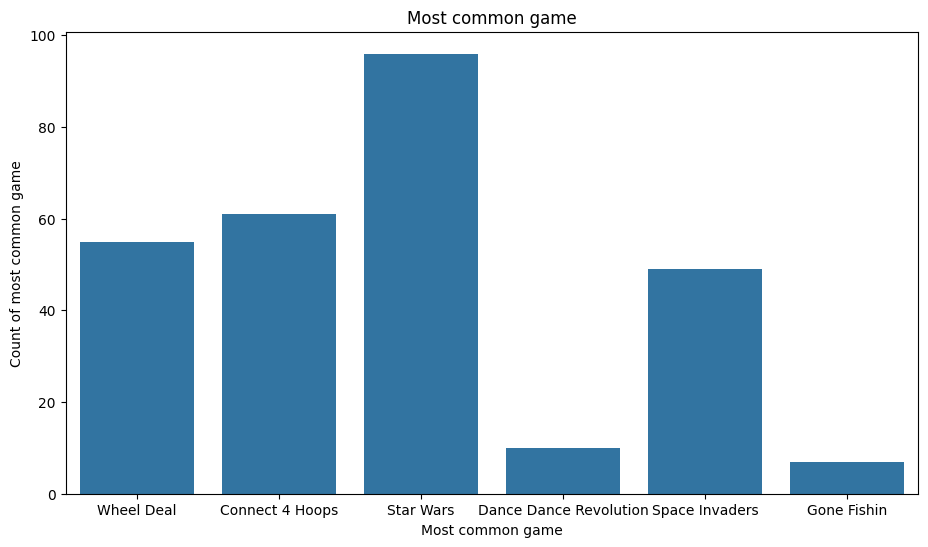

In [ ]:
plt.figure(figsize=(11, 6))
sns.countplot (x= 'most_common_game',data=gzpc)
plt.title('Most common game')
plt.xlabel('Most common game')
plt.ylabel('Count of most common game')
plt.show()

*The barplot shows the popularity of various games among visitors, with "Star Wars" being the most popular game followed by "Connect 4 Hoops" and "Wheel Deal." However, there is a major drop in popularity for the remaining games, with "Gone Fishin" and "Dance Dance Revolution" being the least popular among visitors. Overall, the plot illustrates the distribution of game preferences among visitors, highlighting the highest preferred games over others.*

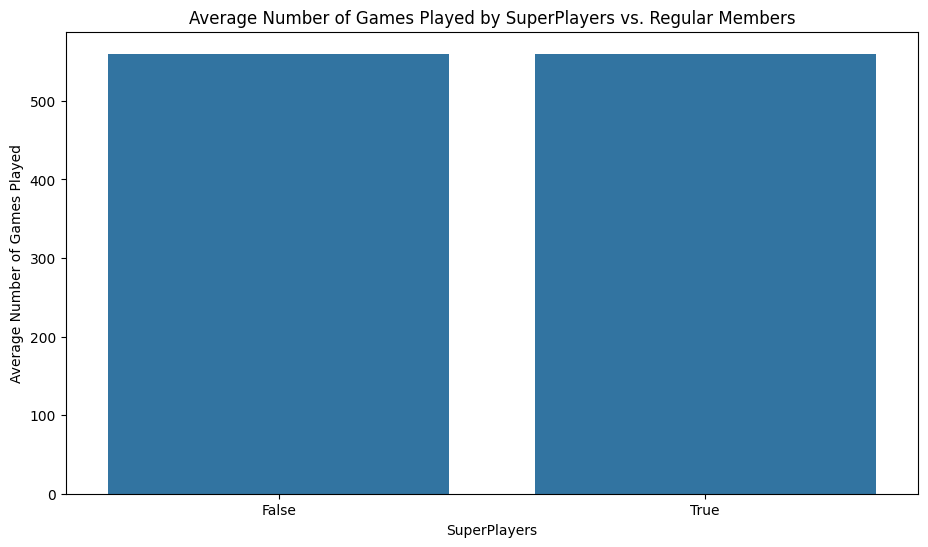

In [ ]:
mean_of_number_of_games= gzpc.total_games .mean()
plt.figure(figsize=(11, 6))
sns.barplot(x='SuperPlayers', y=mean_of_number_of_games, data=gzpc)
plt.title('Average Number of Games Played by SuperPlayers vs. Regular Members')
plt.xlabel('SuperPlayers')
plt.ylabel('Average Number of Games Played')
plt.show()

*Average number of games played by regular and superplayers are same*



<Axes: xlabel='total_spend', ylabel='Count'>

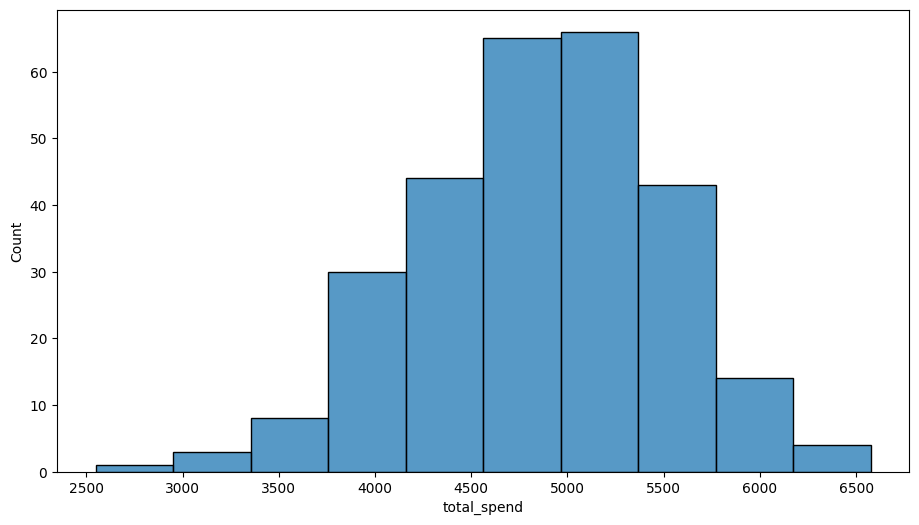

In [ ]:
plt.figure(figsize=(11, 6))
sns.histplot(x='total_spend',bins=10, data=gzpc)

<Axes: xlabel='total_spend', ylabel='Count'>

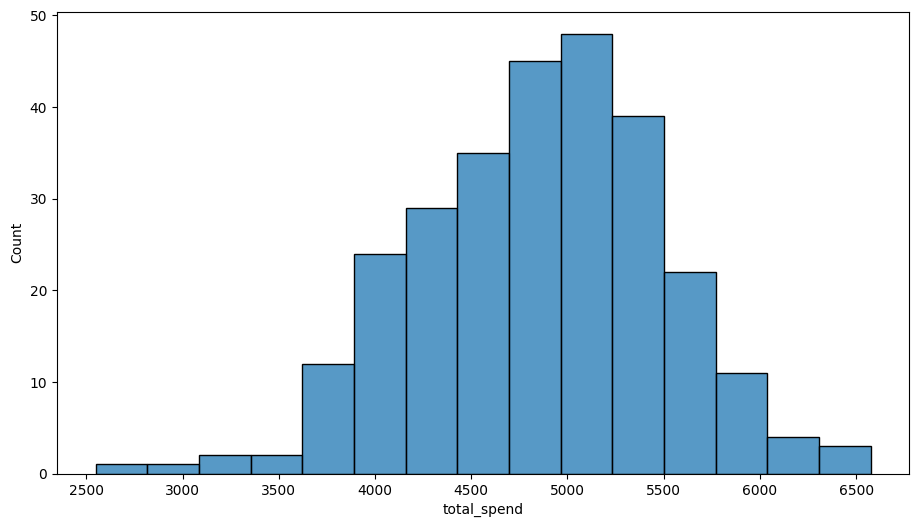

In [ ]:
plt.figure(figsize=(11, 6))
sns.histplot(x='total_spend',bins =15, data=gzpc)

*Increasing the number of bins in a histogram provides more detailed information about the data. For instance, in the first histogram, we can observe a lower total spend between 6000 and 6500, suggesting that fewer members spent within this range. However, with more bins in the second histogram, we can discern even finer details, such as the observation that there are even fewer customers spending around 6500 compared to those spending around 6000.*

<Figure size 1100x600 with 0 Axes>

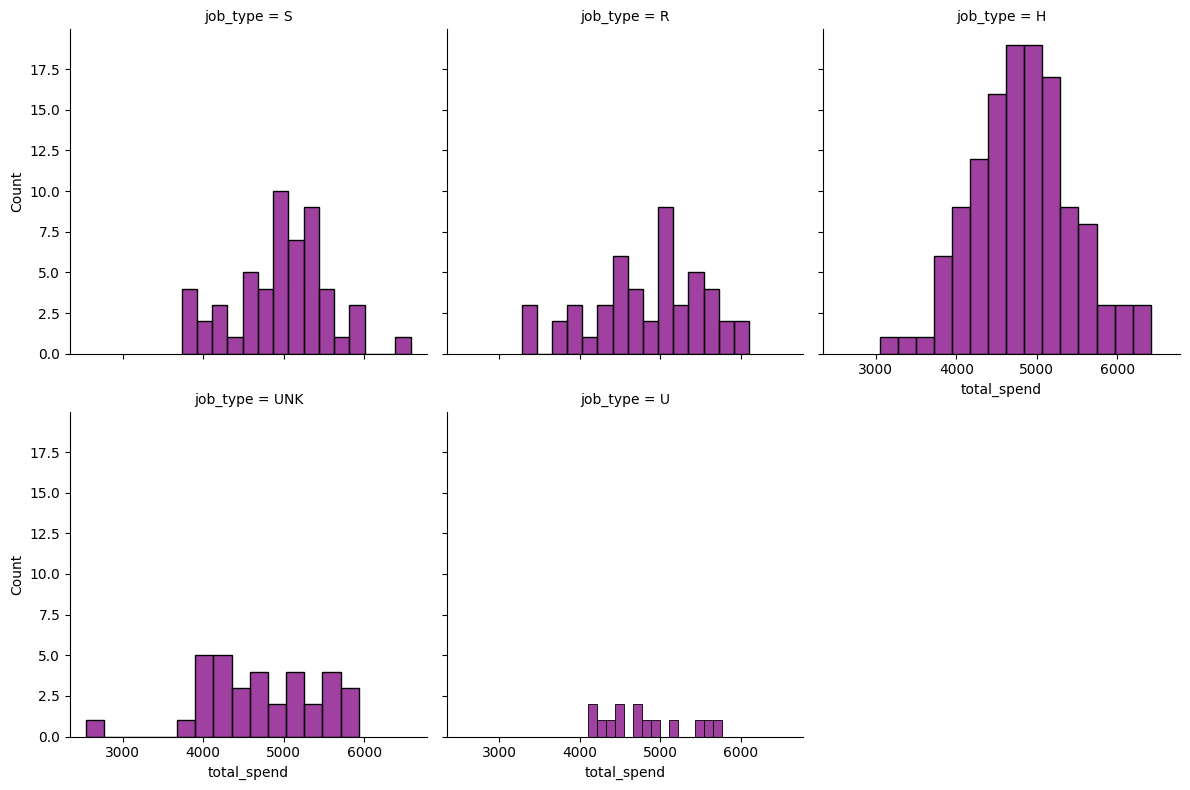

In [ ]:
plt.figure(figsize=(11, 6))
sns.FacetGrid(gzpc, col='job_type', col_wrap=3, height=4).map(sns.histplot, 'total_spend', bins=15, color='purple')
plt.show()

*Members with a salaried job type typically have a spending capacity of 4000 or more, while those with an hourly job type tend to spend $3000 or more. Members with an unknown job type typically have a spending capacity either lower than 3000 or within the 4000 to 6000 range.*


*The histogram indicates distinct groups of members based on their spending capacities: those spending between 3000 and 4000 likely have lower hourly wages or fewer hours worked, while those spending up to 5000 likely have higher pay. A noticeable group can spend around 6000, suggesting they are the highest earners. Additionally, the plot highlights that there are more members with higher earnings in the hourly job type category compared to the salaried job type.*


<Axes: xlabel='total_spend', ylabel='job_type'>

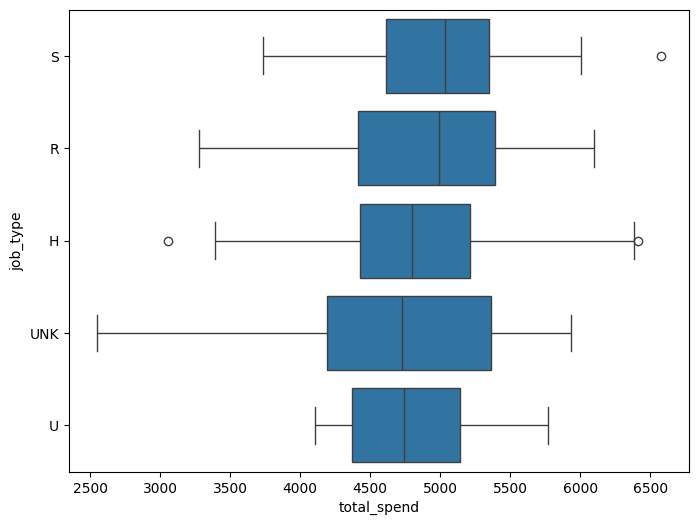

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_spend',y='job_type' , data=gzpc)

In [ ]:
five_num_summary = gzpc.groupby('job_type')['total_spend'].describe()
print(five_num_summary)

*The box plot helps us understand how spending varies across different job types and identify spending patterns.that job type "S" has a wider range of spending amounts, with the middle 50% of spenders (Q1 to Q3) ranging from 4610.74 to 5349.17. The highest spender in this group spent 6575.28. In contrast, job type "U" has a narrower spending range, with the middle 50% of spenders ranging from 4366.24 to 5141.62. The highest spender in this group spent 5769.76.*

<Axes: xlabel='age_start', ylabel='total_spend'>

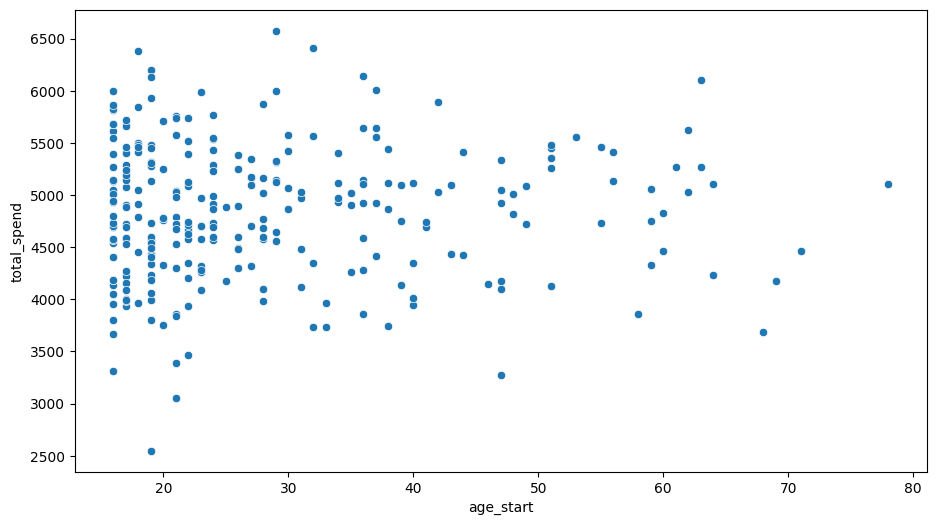

In [ ]:
plt.figure(figsize=(11, 6))
sns.scatterplot(x='age_start',y='total_spend' , data=gzpc)

*No relationship is there between age and total spend, this could be because spend capacity is not connected to age but to how much You have in your hand and how much You can spend*


<Axes: xlabel='visit_week', ylabel='count'>

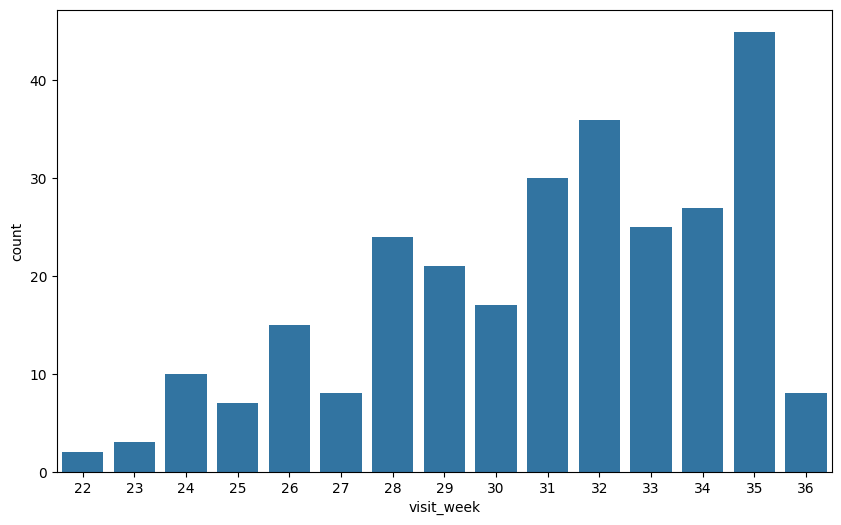

In [ ]:

gzpc['visit_week'] = gzpc['last_visit23'].dt.isocalendar().week

plt.figure(figsize=(10, 6))
sns.countplot(x='visit_week', data=gzpc)

*The highest number of visitors are on the second last week of the summer and lest on the first week of the summer as during the second last week of summer, many families are looking for activities to enjoy together before the end of the summer break. This could lead to increased visits. Conversely, during the first week of summer, families may still be transitioning into summer break mode and may not have yet made plans to visit such venues.*
